In [128]:
import numpy as np
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt

In [129]:
spy = pd.read_excel("E:\\SIRP\\Technical\\ambuja\\new.xlsx",index_col='Date',parse_dates=True)
print(spy)

                  Open        High         Low       Close
Date                                                      
2019-05-30  233.899994  235.250000  232.100006  233.000000
2019-05-31  234.949997  235.000000  228.000000  230.600006
2019-06-03  232.899994  237.800003  229.399994  237.149994
2019-06-04  235.250000  237.850006  226.300003  226.949997
2019-06-06  228.750000  228.750000  220.000000  221.750000
...                ...         ...         ...         ...
2020-05-18  182.000000  182.449997  171.000000  172.149994
2020-05-19  173.899994  176.800003  170.250000  174.600006
2020-05-20  174.500000  181.550003  172.350006  179.649994
2020-05-21  180.699997  183.699997  177.500000  181.000000
2020-05-22  180.000000  187.850006  177.199997  186.949997

[239 rows x 4 columns]


In [70]:
#assigning columns
spy['SMA'] = ta.SMA(np.asarray(spy['Close']),14)

No handles with labels found to put in legend.


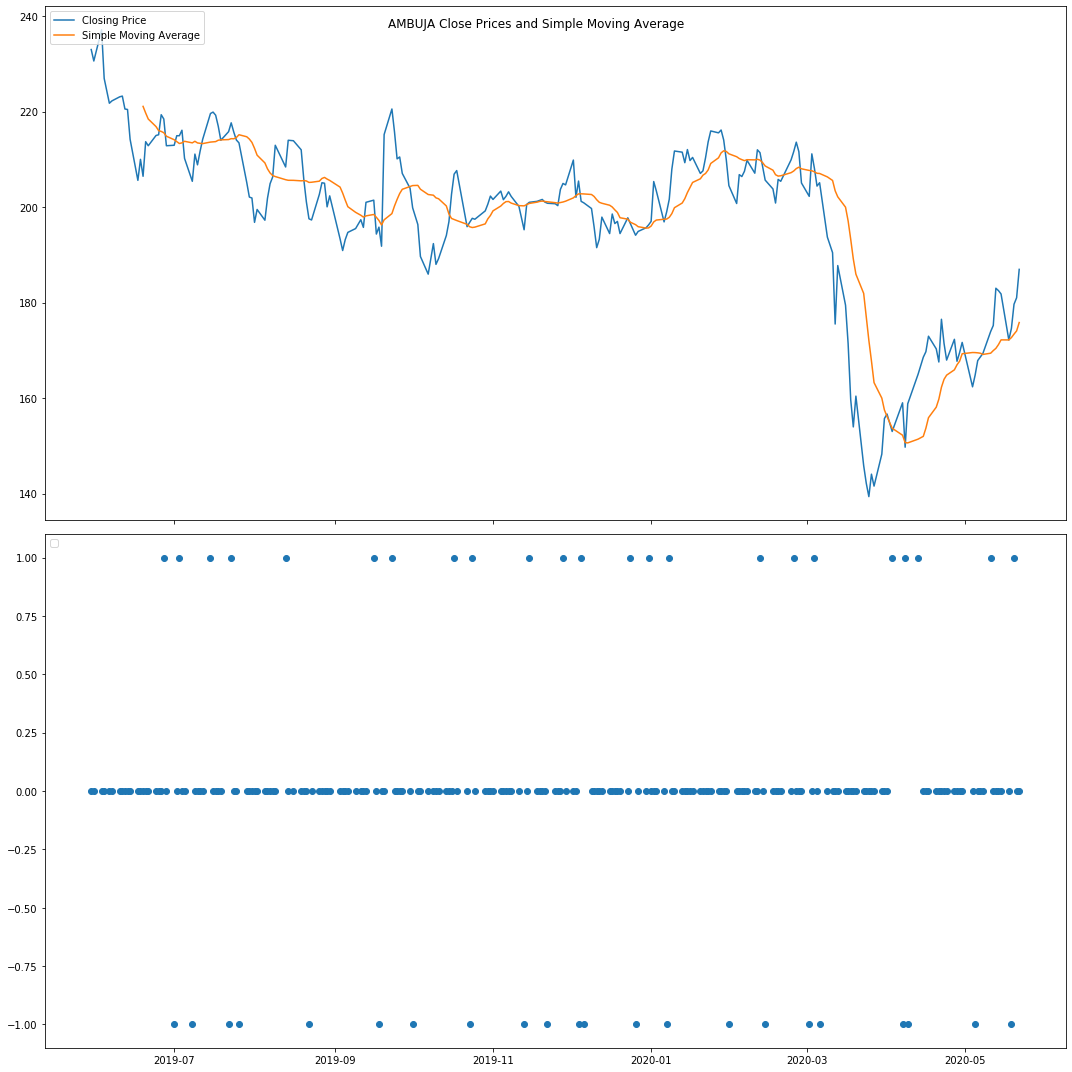

In [51]:
#Price crossover trading signals
#previous periods data(to avaoid backtesting bias)
spy['Close(-1)'] = spy['Close'].shift(1)
spy['SMA(-1)'] = spy['SMA'].shift(1)
spy['Close(-2)'] = spy['Close'].shift(2)
spy['SMA(-2)'] = spy['SMA'].shift(2)

#generate trading signals (buy = 1,sell = -1,do nothing = 0)
spy['SMAsig'] = 0
SMAsig = 0 
for i, r in enumerate(spy.iterrows()):
    if r[1]['Close(-2)'] < r[1]['SMA(-2)'] and r[1]['Close(-1)'] > r[1]['SMA(-1)']:
        SMAsig = 1
    elif r[1]['Close(-2)'] > r[1]['SMA(-2)'] and r[1]['Close(-1)']< r[1]['SMA(-1)']:
        SMAsig = -1
    else:
        SMAsig = 0
    spy.iloc[i, 9] = SMAsig

    
# charts 
fig1,ax = plt.subplots(2,sharex=True, figsize=(15,15))
ax[0].plot(spy['Close'],label = 'Closing Price')
ax[0].plot(spy['SMA'],label = 'Simple Moving Average')
ax[0].legend(loc = 'upper left')
ax[1].plot(spy['SMAsig'], marker='o', linestyle='' )
ax[1].legend(loc = 'upper left')
plt.suptitle('AMBUJA Close Prices and Simple Moving Average')
plt.tight_layout()
plt.show()

    

No handles with labels found to put in legend.


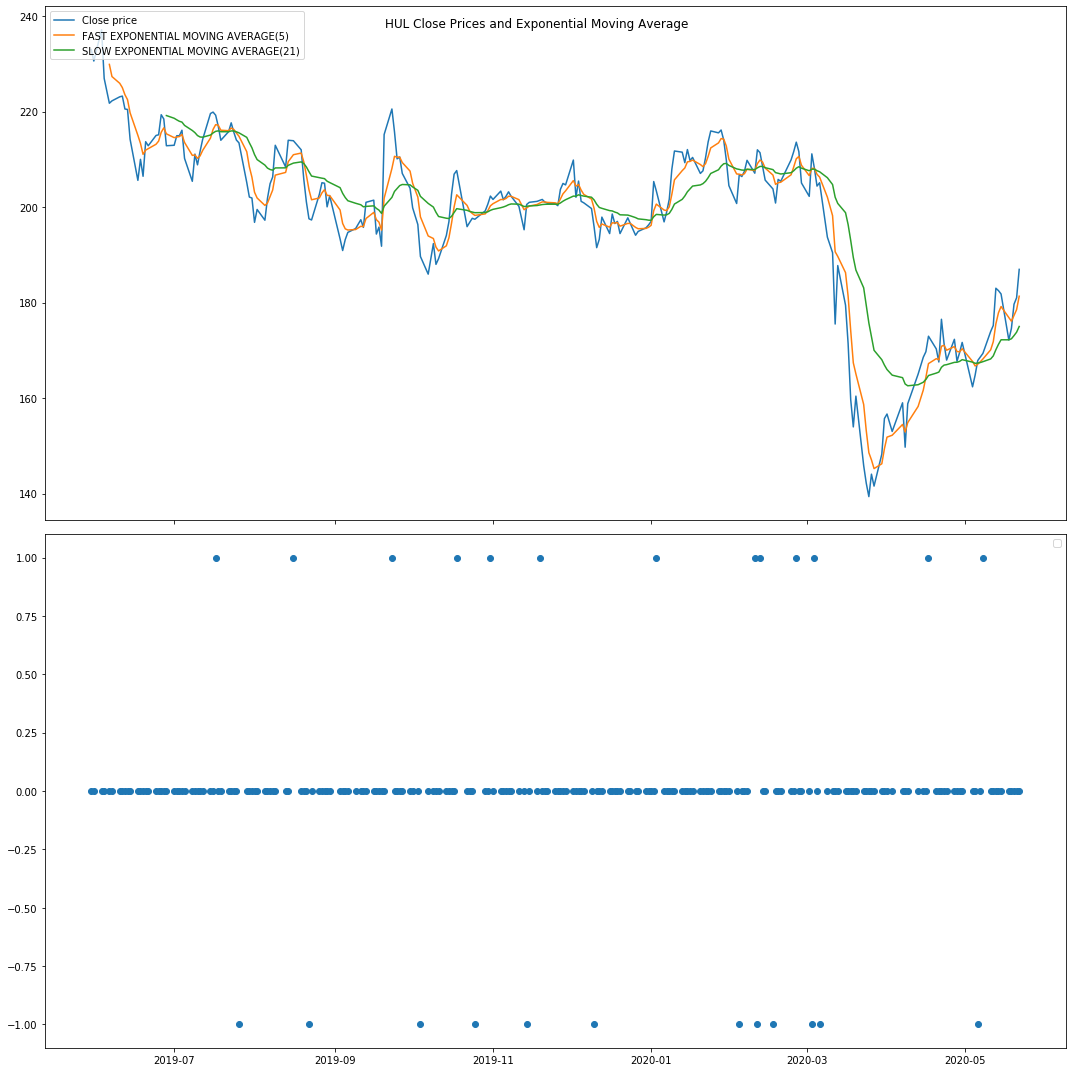

In [8]:
#EMA
#assigning columns
spy['EMAFAST'] = ta.EMA(np.asarray(spy['Close']), 5)
spy['EMASLOW'] = ta.EMA(np.asarray(spy['Close']), 21)
#Price crossover trading signals
#previous periods data(to avaoid backtesting bias)
spy['EMASLOW(-1)'] = spy['EMASLOW'].shift(1)
spy['EMAFAST(-1)'] = spy['EMAFAST'].shift(1)
spy['EMASLOW(-2)'] = spy['EMASLOW'].shift(2)
spy['EMAFAST(-2)'] = spy['EMAFAST'].shift(2)

#generate trading signals (buy = 1,sell = -1,do nothing = 0)
spy['EMAsig'] = 0
EMAsig = 0 
for i, r in enumerate(spy.iterrows()):
    if r[1]['EMAFAST(-2)'] < r[1]['EMASLOW(-2)'] and r[1]['EMAFAST(-1)'] > r[1]['EMASLOW(-1)']:
        EMAsig = 1
    elif r[1]['EMAFAST(-2)'] > r[1]['EMASLOW(-2)'] and r[1]['EMAFAST(-1)']< r[1]['EMASLOW(-1)']:
        EMAsig = -1
    else:
        EMAsig = 0
    spy.iloc[i, 10] = EMAsig

    
# charts 
fig1,ax = plt.subplots(2,sharex=True, figsize=(15,15))
ax[0].plot(spy['Close'],label = 'Close price')
ax[0].plot(spy['EMAFAST'],label = 'FAST EXPONENTIAL MOVING AVERAGE(5)')
ax[0].plot(spy['EMASLOW'],label = 'SLOW EXPONENTIAL MOVING AVERAGE(21)')
ax[0].legend(loc = 'upper left')
ax[1].plot(spy['EMAsig'], marker='o', linestyle='' )
ax[1].legend(loc='upper right')
plt.suptitle('HUL Close Prices and Exponential Moving Average')
plt.tight_layout()
plt.show()

    

No handles with labels found to put in legend.


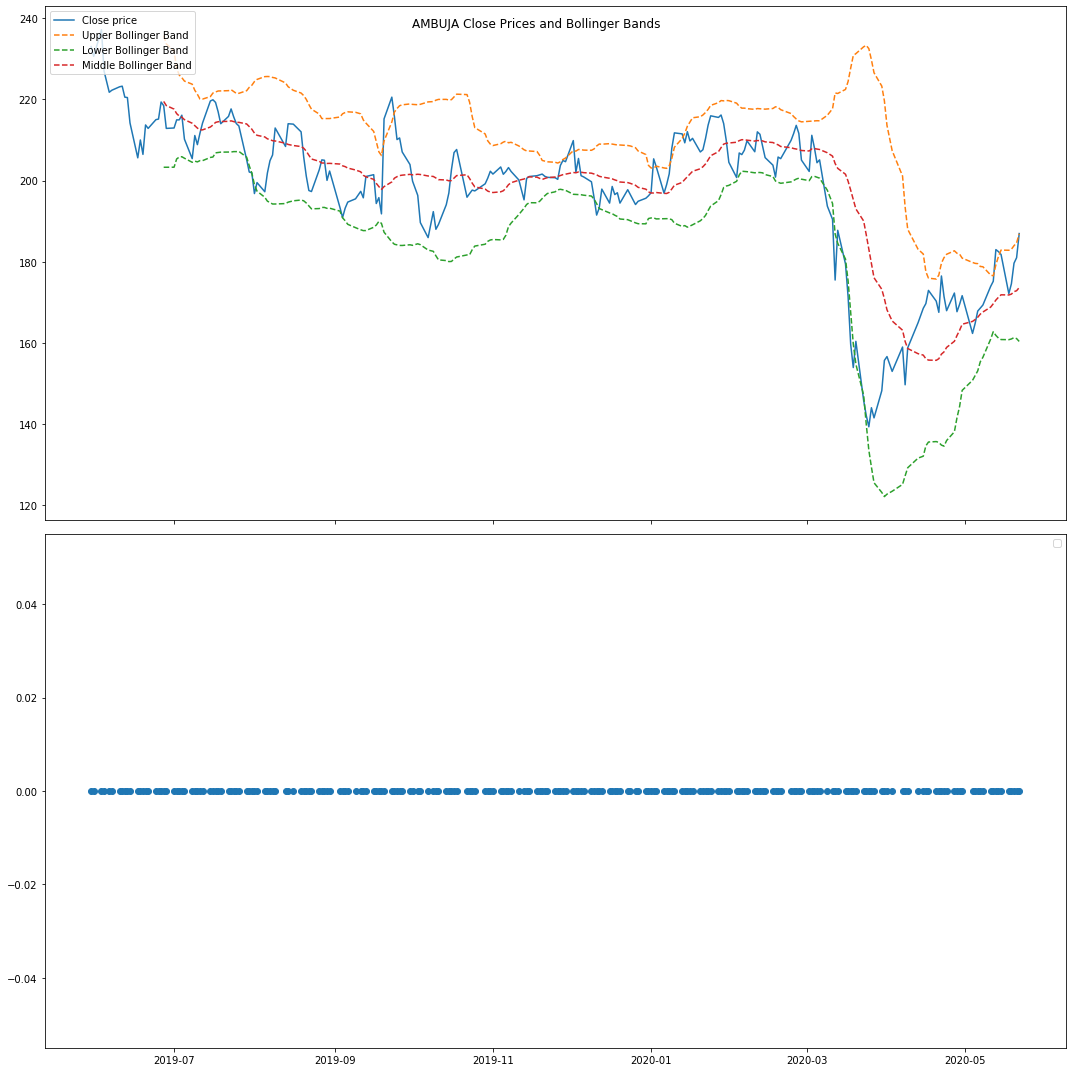

In [58]:
spy['upper'],spy['middle'],spy['lower'] = ta.BBANDS(np.asarray(spy['Close']),timeperiod=20, nbdevup=2,nbdevdn=2, matype=0)
#Price crossover trading signals
#previous periods data(to avaoid backtesting bias)
spy['Close(-1)'] = spy['Close'].shift(1)
spy['lower(-1)'] = spy['lower'].shift(1)
spy['upper(-1)'] = spy['upper'].shift(1)
spy['Close(-2)'] = spy['Close'].shift(2)
spy['lower(-2)'] = spy['lower'].shift(2)
spy['upper(-2)'] = spy['upper'].shift(2)

#generate trading signals (buy = 1,sell = -1,do nothing = 0)
spy['BBsig'] = 0
BBsig = 0 
for i, r in enumerate(spy.iterrows()):
    if r[1]['Close(-2)'] < r[1]['lower(-2)'] and r[1]['Close(-1)'] > r[1]['lower(-1)']:
        BBsig = 1
    elif r[1]['Close(-2)'] > r[1]['upper(-2)'] and r[1]['Close(-1)']< r[1]['upper(-1)']:
        BBsig = -1
    else:
        BBsig = 0
    spy.iloc[i, 8] = BBsig

    
# charts 
fig2,ax = plt.subplots(2,sharex=True, figsize=(15,15))
ax[0].plot(spy['Close'],label = 'Close price')
ax[0].plot(spy['upper'],label = 'Upper Bollinger Band',linestyle = '--')
ax[0].plot(spy['lower'],label = 'Lower Bollinger Band',linestyle = '--')
ax[0].plot(spy['middle'],label = 'Middle Bollinger Band',linestyle = '--')
ax[0].legend(loc = 'upper left')
ax[1].plot(spy['BBsig'], marker='o', linestyle='' )
ax[1].legend(loc='upper right')
plt.suptitle('AMBUJA Close Prices and Bollinger Bands')
plt.tight_layout()
plt.show()

    

No handles with labels found to put in legend.


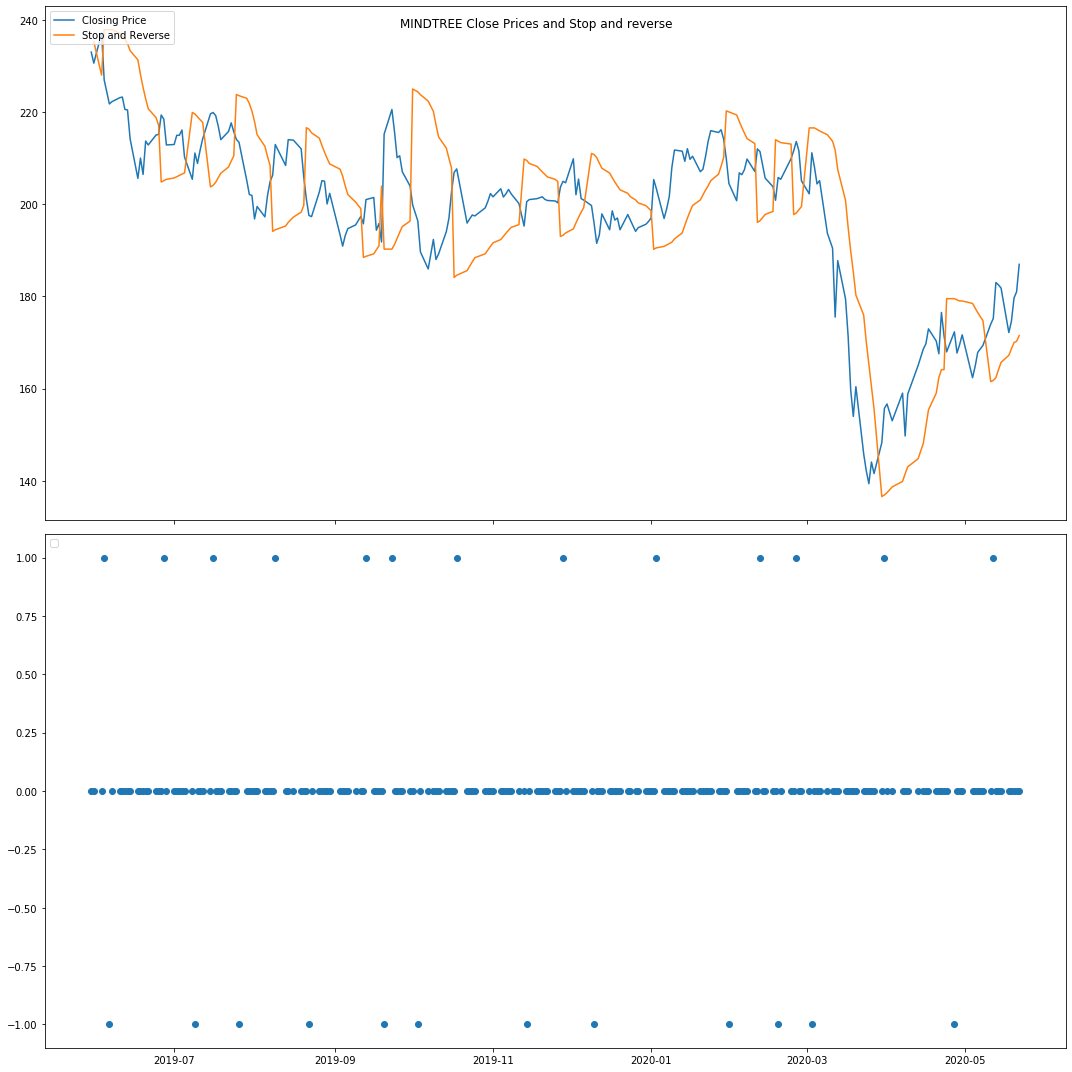

In [64]:
spy['SAR'] = ta.SAR(np.asarray(spy['High']),np.asarray(spy['Low']),acceleration=0.02, maximum=0.2)
#Price crossover trading signals
#previous periods data(to avaoid backtesting bias)
spy['Close(-1)'] = spy['Close'].shift(1)
spy['SAR(-1)'] = spy['SAR'].shift(1)
spy['Close(-2)'] = spy['Close'].shift(2)
spy['SAR(-2)'] = spy['SAR'].shift(2)

#generate trading signals (buy = 1,sell = -1,do nothing = 0)
spy['SARsig'] = 0
SARsig = 0 
for i, r in enumerate(spy.iterrows()):
    if r[1]['Close(-2)'] < r[1]['SAR(-2)'] and r[1]['Close(-1)'] > r[1]['SAR(-1)']:
        SARsig = 1
    elif r[1]['Close(-2)'] > r[1]['SAR(-2)'] and r[1]['Close(-1)']< r[1]['SAR(-1)']:
        SARsig = -1
    else:
        SARsig = 0
    spy.iloc[i, 9] = SARsig

    
# charts 
fig3,ax = plt.subplots(2,sharex=True, figsize=(15,15))
ax[0].plot(spy['Close'],label = 'Closing Price')
ax[0].plot(spy['SAR'],label = 'Stop and Reverse')
ax[0].legend(loc = 'upper left')
ax[1].plot(spy['SARsig'], marker='o', linestyle='' )
ax[1].legend(loc = 'upper left')
plt.suptitle('MINDTREE Close Prices and Stop and reverse')
plt.tight_layout()
plt.show()

    

No handles with labels found to put in legend.


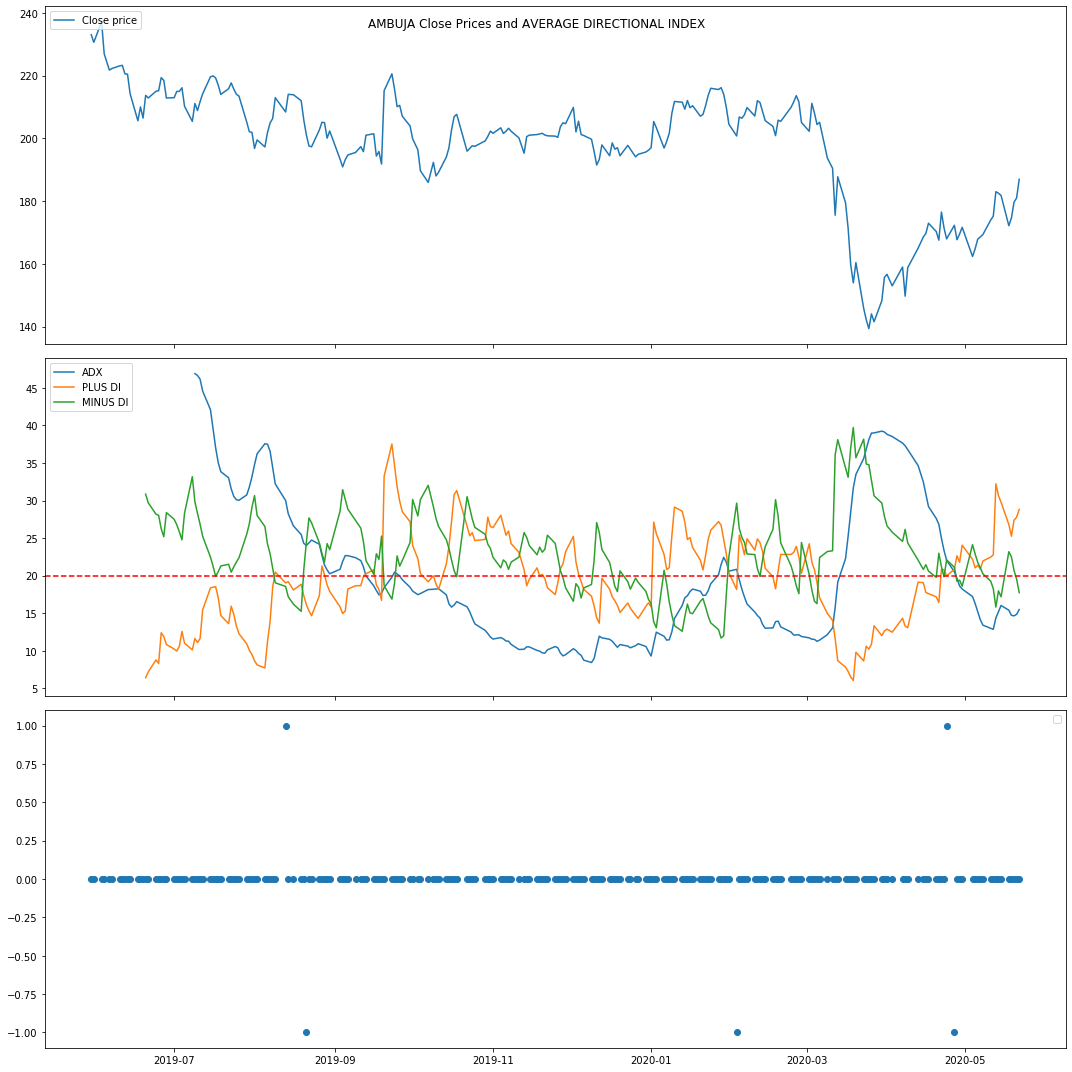

In [67]:
spy['ADX'] = ta.ADX(np.asarray(spy['High']),np.asarray(spy['Low']),np.asarray(spy['Close']),timeperiod = 14)
spy['+di'] = ta.PLUS_DI(np.asarray(spy['High']),np.asarray(spy['Low']),np.asarray(spy['Close']), timeperiod = 14)
spy['-di'] = ta.MINUS_DI(np.array(spy['High']),np.asarray(spy['Low']),np.asarray(spy['Close']), timeperiod =14)
#Price crossover trading signals
#previous periods data(to avaoid backtesting bias)
spy['ADX(-1)'] = spy['ADX'].shift(1)
spy['+di(-1)'] = spy['+di'].shift(1)
spy['-di(-1)'] = spy['-di'].shift(1)
spy['+di(-2)'] = spy['+di'].shift(2)
spy['-di(-2)'] = spy['-di'].shift(2)

#generate trading signals (buy = 1,sell = -1,do nothing = 0)
spy['ADXsig'] = 0
BBsig = 0 
for i, r in enumerate(spy.iterrows()):
    if r[1]['+di(-2)'] < r[1]['-di(-2)'] and r[1]['+di(-1)'] > r[1]['-di(-1)'] and r[1]['ADX(-1)']>20:
        ADXsig = 1
    elif r[1]['+di(-2)'] > r[1]['-di(-2)'] and r[1]['+di(-1)']< r[1]['-di(-1)'] and r[1]['ADX(-1)']>20:
        ADXsig = -1
    else:
        ADXsig = 0
    spy.iloc[i, 12] = ADXsig

    
# charts 
fig2,ax = plt.subplots(3,sharex=True, figsize=(15,15))
ax[0].plot(spy['Close'],label = 'Close price')
ax[1].plot(spy['ADX'],label = 'ADX')
ax[1].plot(spy['+di'],label = 'PLUS DI')
ax[1].plot(spy['-di'],label = 'MINUS DI')
ax[1].axhline(y=20,linestyle = '--',color = 'red')
ax[0].legend(loc = 'upper left')
ax[1].legend(loc = 'upper left')
ax[2].plot(spy['ADXsig'], marker='o', linestyle='' )
ax[2].legend(loc='upper right')
plt.suptitle('AMBUJA Close Prices and AVERAGE DIRECTIONAL INDEX')
plt.tight_layout()
plt.show()


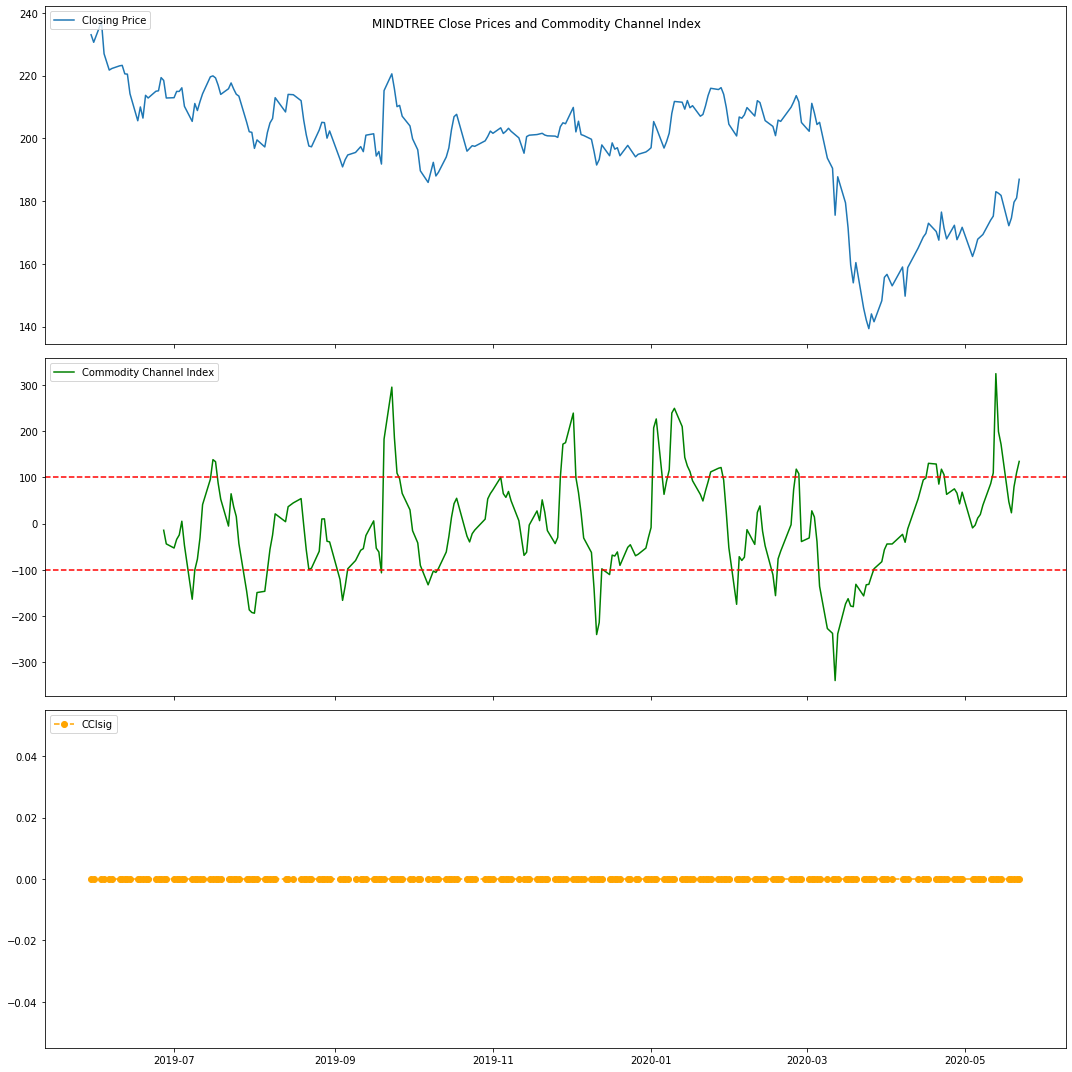

In [119]:
spy['CCI'] = ta.CCI(np.asarray(spy['High']),np.asarray(spy['Low']),np.asarray(spy['Close']),timeperiod = 20)
#Price crossover trading signals
#previous periods data(to avaoid backtesting bias)
spy['CCI(-1)'] = spy['CCI'].shift(1)
spy['CCI(-2)'] = spy['CCI'].shift(2)

#generate trading signals (buy = 1,sell = -1,do nothing = 0)
spy['CCIsig'] = 0
CCIsig = 0 
for i, r in enumerate(spy.iterrows()):
    if r[1]['CCI(-2)'] < -100 and r[1]['CCI(-1)'] > -100:
        CCIsig = 1
    elif r[1]['CCI(-2)'] > 100 and r[1]['CCI(-1)']< 100:
        CCIsig = -1
    else:
        CCIsig = 0
    spy.iloc[i,9] = CCIsig

    
# charts 
fig3,ax = plt.subplots(3,sharex=True, figsize=(15,15))
ax[0].plot(spy['Close'],label = 'Closing Price')
ax[1].plot(spy['CCI'],label = 'Commodity Channel Index',color = 'green')
ax[0].legend(loc = 'upper left')
ax[1].axhline(y = 100,linestyle='--',color='red' )
ax[1].axhline(y=-100,linestyle='--',color='red')
ax[1].legend(loc = 'upper left')
ax[2].plot(spy['CCIsig'],marker = 'o',linestyle='--',color='orange',label = 'CCIsig')
ax[2].legend(loc = 'upper left')
plt.suptitle('MINDTREE Close Prices and Commodity Channel Index')
plt.tight_layout()
plt.show()

    

In [ ]:
spy['macd'],spy['macdema'],spy['macdhist'] = ta.MACD(np.asarray(spy['Close']),fastperiod=12,slowperiod=26,signalperiod=9)
#Price crossover trading signals
#previous periods data(to avaoid backtesting bias)
spy['macd(-1)'] = spy['macd'].shift(1)
spy['macdema(-1)'] = spy['macdema'].shift(1)
spy['macd(-2)'] = spy['macd'].shift(2)
spy['macdema(-2)'] = spy['macdema'].shift(2)

#generate trading signals (buy = 1,sell = -1,do nothing = 0)
spy['macdsig'] = 0
macdsig = 0 
for i, r in enumerate(spy.iterrows()):
    if r[1]['macd(-2)'] < r[1]['macdema(-2)'] and r[1]['macd(-1)'] > r[1]['macdema(-1)']:
        macdsig = 1
    elif r[1]['macd(-2)'] > r[1]['macdema(-2)'] and r[1]['macd(-1)']< r[1]['macdema(-1)']:
        macdsig = -1
    else:
        macdsig = 0
    spy.iloc[i, 11] = macdsig

    
# charts 
fig2,ax = plt.subplots(3,sharex=True, figsize=(15,15))
ax[0].plot(spy['Close'],label = 'Close price')
ax[1].plot(spy['macd'],label = 'MACD')
ax[1].plot(spy['macdema'],label = 'MACDEMA')
ax[1].plot(spy['macdhist'],label = 'MACD HISTOGRAM')
ax[0].legend(loc = 'upper left')
ax[1].legend(loc = 'upper left')
ax[2].plot(spy['macdsig'], marker='o', linestyle='' )
ax[2].legend(loc='upper right')
plt.suptitle('AMBUJA Close Prices and MACD')
plt.tight_layout()
plt.show()

    

In [ ]:
spy['roc'] = ta.ROC(np.asarray(spy['Close']),timeperiod=21)

In [ ]:
#Price crossover trading signals
#previous periods data(to avaoid backtesting bias)
spy['roc(-1)'] = spy['roc'].shift(1)
spy['roc(-2)'] = spy['roc'].shift(2)

#generate trading signals (buy = 1,sell = -1,do nothing = 0)
spy['rocsig'] = 0
rocsig = 0 
for i, r in enumerate(spy.iterrows()):
    if r[1]['roc(-2)'] < -5 and r[1]['roc(-1)'] > -5:
        rocsig = 1
    elif r[1]['roc(-2)'] > 5 and r[1]['roc(-1)']< 5:
        rocsig = -1
    else:
        rocsig = 0
    spy.iloc[i,16] = rocsig

    
# charts 
fig3,ax = plt.subplots(3,sharex=True, figsize=(15,15))
ax[0].plot(spy['Close'],label = 'Closing Price')
ax[1].plot(spy['roc'],label = 'Rate of change',color = 'green')
ax[0].legend(loc = 'upper left')
ax[1].axhline(y = 5,linestyle='--',color='red' )
ax[1].axhline(y=-5,linestyle='--',color='red')
ax[1].legend(loc = 'upper left')
ax[2].plot(spy['rocsig'],marker = 'o',linestyle='--',color='orange',label = 'ROCsig')
ax[2].legend(loc = 'upper left')
plt.suptitle('AMBUJA Close Prices and Rate of Change')
plt.tight_layout()
plt.show()

    

In [ ]:
spy['rsi'] = ta.RSI(np.asarray(spy['Close']),timeperiod=14)
#Price crossover trading signals
#previous periods data(to avaoid backtesting bias)
spy['rsi(-1)'] = spy['rsi'].shift(1)
spy['rsi(-2)'] = spy['rsi'].shift(2)

#generate trading signals (buy = 1,sell = -1,do nothing = 0)
spy['rsisig'] = 0
rsisig = 0 
for i, r in enumerate(spy.iterrows()):
    if r[1]['rsi(-2)'] < 30 and r[1]['rsi(-1)'] > 30:
        rsisig = 1
    elif r[1]['rsi(-2)'] > 70 and r[1]['rsi(-1)'] < 70:
        rsisig = -1
    else:
        rsisig = 0
    spy.iloc[i, 9] = rsisig

    
# charts 
fig3,ax = plt.subplots(3,sharex=True, figsize=(15,15))
ax[0].plot(spy['Close'],label = 'Closing Price')
ax[1].plot(spy['rsi'],label = 'Relative Strength Index',color = 'green')
ax[0].legend(loc = 'upper left')
ax[1].axhline(y = 30,linestyle='--',color='red' )
ax[1].axhline(y = 70,linestyle='--',color='red')
ax[1].legend(loc = 'upper left')
ax[2].plot(spy['rsisig'],marker = 'o',linestyle='--',color='orange',label = 'RSIsig')
ax[2].legend(loc = 'upper left')
plt.suptitle('AMBUJA Close Prices and Relative Strength Indicator')
plt.tight_layout()
plt.show()

    

In [34]:
spy['slowk'],spy['slowd']= ta.STOCH(np.asarray(spy['High']),np.asarray(spy['Low']),np.asarray(spy['Close']),fastk_period=14,slowk_period=3,slowk_matype=0,slowd_period=3,slowd_matype=0)

In [118]:
#Price crossover trading signals
#previous periods data(to avaoid backtesting bias)
spy['slowd(-1)'] = spy['slowd'].shift(1)
spy['slowd(-2)'] = spy['slowd'].shift(2)

#generate trading signals (buy = 1,sell = -1,do nothing = 0)
spy['stosig'] = 0
stosig = 0 
for i, r in enumerate(spy.iterrows()):
    if r[1]['slowd(-2)'] < 20 and r[1]['slowd(-1)'] > 20:
        stosig = 1
    elif r[1]['slowd(-2)'] > 80 and r[1]['slowd(-1)']< 80:
        stosig = -1
    else:
        stosig = 0
    spy.iloc[i,5] = stosig

    
# charts 
fig6,ax = plt.subplots(3,sharex=True, figsize=(15,15))
ax[0].plot(spy['Close'],label = 'Closing Price')
ax[1].plot(spy['slowk'],label = 'Slowk',color = 'red',linestyle='--')
ax[1].plot(spy['slowd'],label = 'slowd',color = 'green')
ax[0].legend(loc = 'upper left')
ax[1].axhline(y = 20,linestyle='--',color='orange' )
ax[1].axhline(y=80,linestyle='--',color='orange')
ax[1].legend(loc = 'upper left')
ax[2].plot(spy['stosig'],marker = 'o',linestyle='--',color='orange',label = 'STOCHASTICsig')
ax[2].legend(loc = 'upper left')
plt.suptitle('AMBUJA Close Prices and Stochastic Oscillator')
plt.tight_layout()
plt.show()

    

KeyError: 'slowd'

In [131]:
spy['wpr'] = ta.WILLR(np.asarray(spy['High']),np.asarray(spy['Low']),np.asarray(spy['Close']),timeperiod=14)
#Price crossover trading signals
#previous periods data(to avaoid backtesting bias)
spy['wpr(-1)'] = spy['wpr'].shift(1)
spy['wpr(-2)'] = spy['wpr'].shift(2)

#generate trading signals (buy = 1,sell = -1,do nothing = 0)
spy['wprsig'] = 0
wprsig = 0 
for i, r in enumerate(spy.iterrows()):
    if r[1]['wpr(-2)'] < -80 and r[1]['wpr(-1)'] > -80:
        wprsig = 1
    elif r[1]['wpr(-2)'] > -20 and r[1]['wpr(-1)']< -20:
        wprsig = -1
    else:
        wprsig = 0
    spy.iloc[i,11] = wprsig

    
# charts 
fig3,ax = plt.subplots(3,sharex=True, figsize=(15,15))
ax[0].plot(spy['Close'],label = 'Closing Price')
ax[1].plot(spy['wpr'],label = 'William %R',color = 'green')
ax[0].legend(loc = 'upper left')
ax[1].axhline(y = -80,linestyle='--',color='red' )
ax[1].axhline(y=-20,linestyle='--',color='red')
ax[1].legend(loc = 'upper left')
ax[2].plot(spy['wprsig'],marker = 'o',linestyle='--',color='orange',label = 'William % R sig')
ax[2].legend(loc = 'upper left')
plt.suptitle('MINDTREE Close Prices and william R')
plt.tight_layout()
plt.show()

    

IndexError: single positional indexer is out-of-bounds